In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import norm


#libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, truncnorm
from numpy.random import Generator, MT19937
import time
from scipy.special import logsumexp 

In [2]:
#Initializing the random number generator
seed = int(time.time()) 
bitgen = MT19937(seed)
rng = Generator(bitgen)  # reproducible generator

In [3]:
# Define the integrand function
def integrand(x):
    """
    Example integrand: f(x) = exp(-x**2)
    """
    return np.exp(-x**2)

# Estimate the integral using uniform Monte Carlo
def monte_carlo_integral(f, N, lower, upper, rng):
    samples = rng.uniform(lower, upper, N)
    values = f(samples)
    estimate = (upper - lower) * np.mean(values)
    return estimate

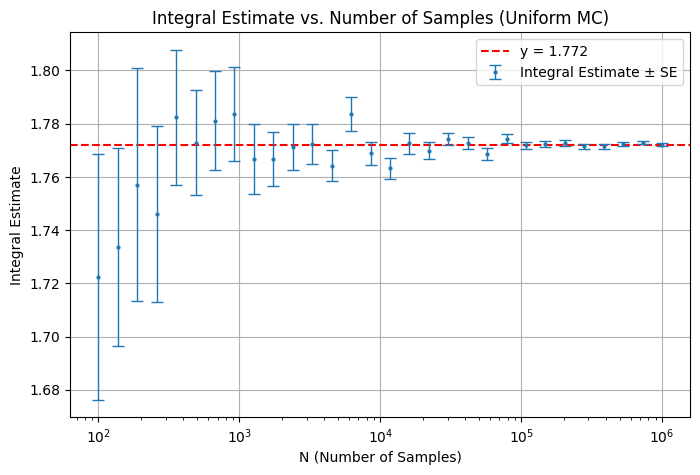

In [4]:
N_values = np.logspace(2, 6, 30, dtype=int)
num_repeats = 40  # Number of repeated runs for error bars
integral_estimates = []
std_errors = []

for N_val in N_values:
    estimates = []
    for _ in range(num_repeats):
        estimate = monte_carlo_integral(integrand, N_val, -5, 5, rng)
        estimates.append(estimate)
    integral_estimates.append(np.mean(estimates))
    std_errors.append(np.std(estimates) / np.sqrt(num_repeats))  # Standard error

plt.figure(figsize=(8, 5))
plt.axhline(y=1.772, color='red', linestyle='--', label='y = 1.772')
plt.errorbar(N_values, integral_estimates, yerr=std_errors, fmt='o', markersize=2, capsize=4, elinewidth=1, capthick=1, label='Integral Estimate ± SE')
plt.xscale('log')
plt.xlabel('N (Number of Samples)')
plt.ylabel('Integral Estimate')
plt.title('Integral Estimate vs. Number of Samples (Uniform MC)')
plt.grid(True)
plt.legend()
plt.show()